### Goal: To predict the values of air pollution measurements over time

In [1]:
# General libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting context parameters
sns.set_context('notebook')

### Acuqire the Training Data

In [2]:
# Read the train.csv
df = pd.read_csv("train.csv")

# Print the descriptive summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [3]:
# Print the first 5 rows as a sample
df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


**Takeaways**
- The dataset contains 12 columns: 9 of them are features and 3 of them are target variables.
- The features are datetime, temperature in celsius, relative and absolute humidity and the readings from  5 sensors.
- Besides datetime, all the features are numeric.
- Three target values need to be predicted: carbon monoxide, benzene, and nitrogen oxides.

In [4]:
# Any missing values?
df.isnull().sum(axis=0)

date_time                 0
deg_C                     0
relative_humidity         0
absolute_humidity         0
sensor_1                  0
sensor_2                  0
sensor_3                  0
sensor_4                  0
sensor_5                  0
target_carbon_monoxide    0
target_benzene            0
target_nitrogen_oxides    0
dtype: int64

In [5]:
# Any duplicates?
df.duplicated().sum()

0

**Takeaways**
- No missing values and duplicates exist.

In [6]:
# Convert the datetime to the correct format
df.date_time = pd.to_datetime(df.date_time)
df.dtypes

date_time                 datetime64[ns]
deg_C                            float64
relative_humidity                float64
absolute_humidity                float64
sensor_1                         float64
sensor_2                         float64
sensor_3                         float64
sensor_4                         float64
sensor_5                         float64
target_carbon_monoxide           float64
target_benzene                   float64
target_nitrogen_oxides           float64
dtype: object

In [7]:
# Set the date_time as the index
df = df.set_index('date_time')
df.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [8]:
# Print the descriptive statistics of the numeric features
df.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000


**Takeaways**
- The temperature are all above 0 and ranges from 1.3 to 46.1 degrees.
- The absolute humidity is the total mass of water vapor present in a given volume of air.
- The relative humidity is defined as the ratio of the partial pressure of water vapor in the mixture to the equilibrium vapor pressure of water over a flat surface of pure water at a given temperature.
- The unit of the target variable is not specified. The numbers is supposed to represent the concentration of the toxic gas in the air and the unit is usually ppm. 

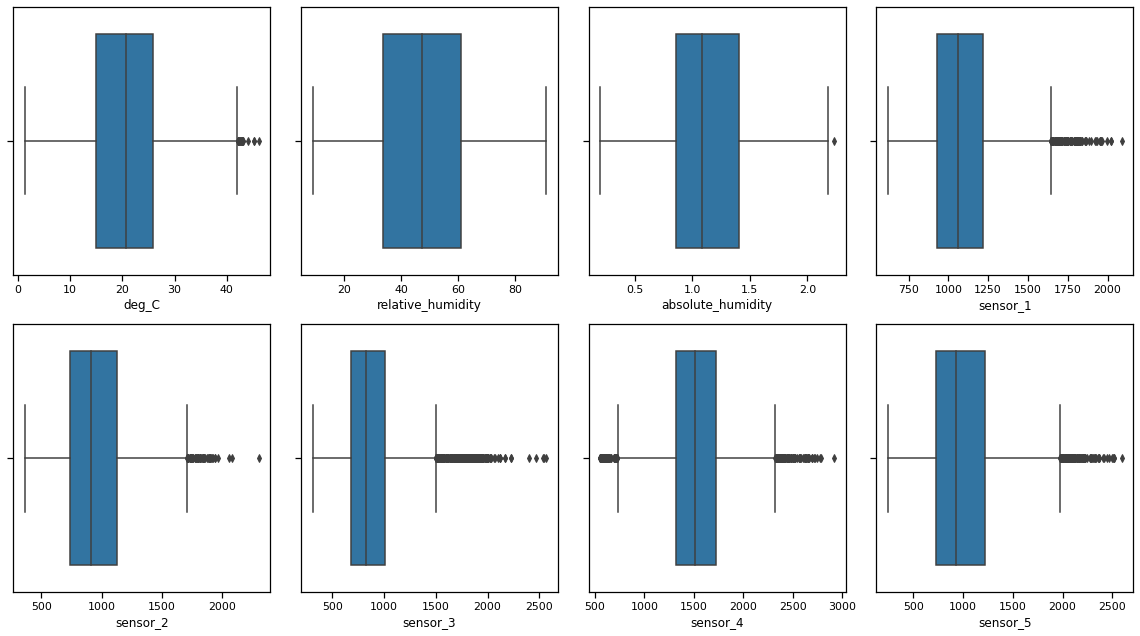

In [9]:
# Plot the distribution of the features

features = ['deg_C', 'relative_humidity', 'absolute_humidity',
            'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']

fig, axes = plt.subplots(2,4, figsize=(16,9))

axes = axes.ravel()

for i, feature in zip(range(8), features):
#     df[feature].hist(ax=axes[i])
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_xlabel(feature)
    
plt.tight_layout()
plt.show()

**Takeaways**
- All the sensor readings contains outliers beyond the maximum.
- Only sensor 4 has outliers beyond minimum.
- **<i>How to deal with the outliers?</i>**

### How is the aboslute humidity related to relative humidity?

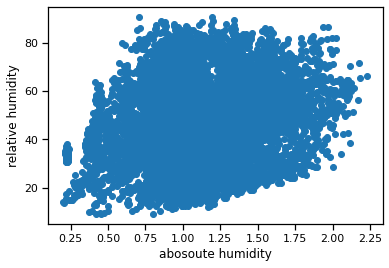

In [31]:
plt.scatter('absolute_humidity', 'relative_humidity', data=df)
plt.xlabel('abosoute humidity')
plt.ylabel('relative humidity')
plt.show()

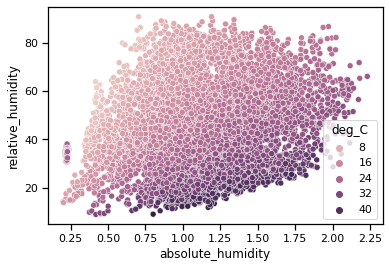

In [36]:
sns.scatterplot(data=df, x='absolute_humidity', y='relative_humidity', hue='deg_C')
plt.show()

**Takeaways**
- No obvious relationship has been found between aboslute and relative humidity.

### How is the temperature related with humidity?

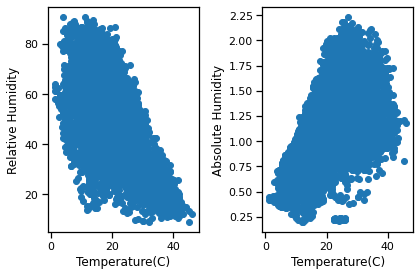

In [10]:
plt.subplot(121)
plt.scatter('deg_C', 'relative_humidity', data=df)
plt.xlabel('Temperature(C)')
plt.ylabel('Relative Humidity')

plt.subplot(122)
plt.scatter('deg_C','absolute_humidity', data=df)
plt.xlabel('Temperature(C)')
plt.ylabel('Absolute Humidity')

plt.tight_layout()
plt.show()

**Takeaways**
- Generally speaking, when the temperature goes up, the relative humidity goes down while the absolute humidity goes up. 

### Does one sensor detect more than one toxic chemicals?
- My assumption is that sensors have different sensitivity towards different chemcials.

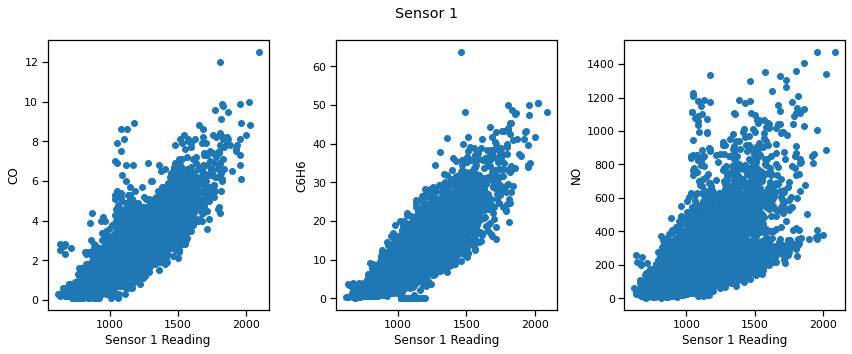

In [24]:
plt.figure(figsize=(12,5))
plt.suptitle('Sensor 1')

plt.subplot(131)
plt.scatter('sensor_1', 'target_carbon_monoxide', data=df)
plt.xlabel('Sensor 1 Reading')
plt.ylabel('CO')

plt.subplot(132)
plt.scatter('sensor_1', 'target_benzene', data=df)
plt.xlabel('Sensor 1 Reading')
plt.ylabel('C6H6')

plt.subplot(133)
plt.scatter('sensor_1', 'target_nitrogen_oxides', data=df)
plt.xlabel('Sensor 1 Reading')
plt.ylabel('NO')

plt.tight_layout()
plt.show()

**Takeaways**
- Generally speaking, as the readings in sensor 1 increases, the amount of all three chemcials in the air increase. 
- The data points in the sensor_1-NO graph are more scattered especially when the readings are above 1000.  

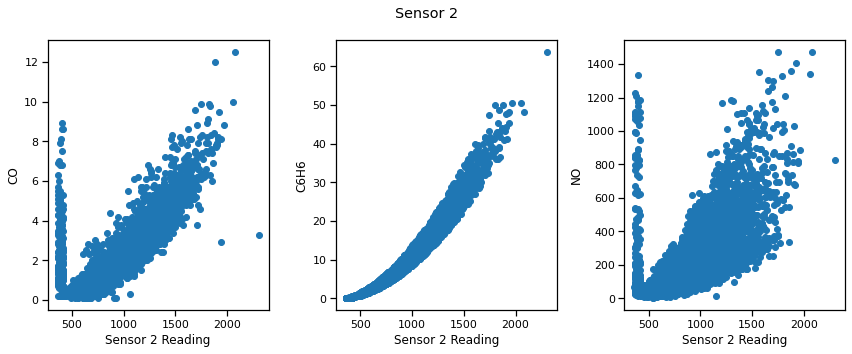

In [25]:
plt.figure(figsize=(12,5))
plt.suptitle('Sensor 2')

plt.subplot(131)
plt.scatter('sensor_2', 'target_carbon_monoxide', data=df)
plt.xlabel('Sensor 2 Reading')
plt.ylabel('CO')

plt.subplot(132)
plt.scatter('sensor_2', 'target_benzene', data=df)
plt.xlabel('Sensor 2 Reading')
plt.ylabel('C6H6')

plt.subplot(133)
plt.scatter('sensor_2', 'target_nitrogen_oxides', data=df)
plt.xlabel('Sensor 2 Reading')
plt.ylabel('NO')

plt.tight_layout()
plt.show()

**Takeaways**
- When the reading of sensor 2 is below 500, the concentration of CO and NO is unrelated with the sensor_2 readings. 
- The sensor_2 readings shows a linear relationship with the concentration of benzene. 

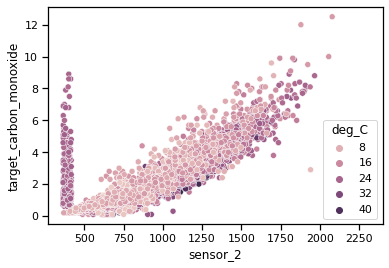

In [41]:
sns.scatterplot(x='sensor_2', y='target_carbon_monoxide', data=df, hue='deg_C')
plt.show()

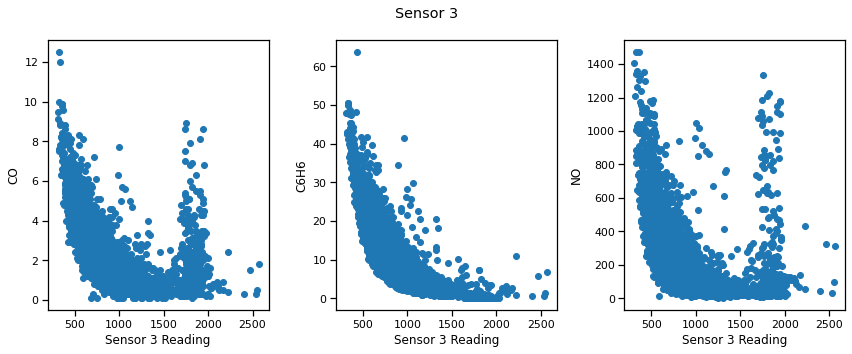

In [26]:
plt.figure(figsize=(12,5))
plt.suptitle('Sensor 3')

plt.subplot(131)
plt.scatter('sensor_3', 'target_carbon_monoxide', data=df)
plt.xlabel('Sensor 3 Reading')
plt.ylabel('CO')

plt.subplot(132)
plt.scatter('sensor_3', 'target_benzene', data=df)
plt.xlabel('Sensor 3 Reading')
plt.ylabel('C6H6')

plt.subplot(133)
plt.scatter('sensor_3', 'target_nitrogen_oxides', data=df)
plt.xlabel('Sensor 3 Reading')
plt.ylabel('NO')

plt.tight_layout()
plt.show()

**Takeaways**
- When the readings of sensor 3 is nearly 2000, the concentration of CO and NO is unrelated with the sensor readings.
- Sensor 3 is the only sensor of which the readings shows a inverse relatioship with the concentration of the chemicals.  

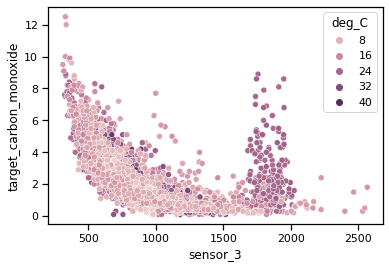

In [47]:
sns.scatterplot(x='sensor_3', y='target_carbon_monoxide', data=df, hue='deg_C')
plt.show()

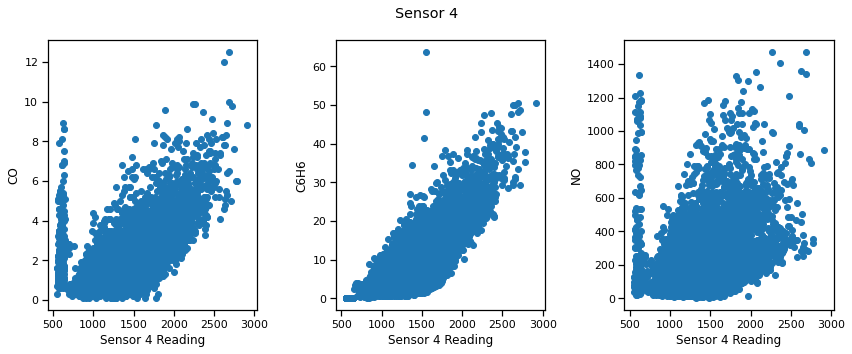

In [27]:
plt.figure(figsize=(12,5))
plt.suptitle('Sensor 4')

plt.subplot(131)
plt.scatter('sensor_4', 'target_carbon_monoxide', data=df)
plt.xlabel('Sensor 4 Reading')
plt.ylabel('CO')

plt.subplot(132)
plt.scatter('sensor_4', 'target_benzene', data=df)
plt.xlabel('Sensor 4 Reading')
plt.ylabel('C6H6')

plt.subplot(133)
plt.scatter('sensor_4', 'target_nitrogen_oxides', data=df)
plt.xlabel('Sensor 4 Reading')
plt.ylabel('NO')

plt.tight_layout()
plt.show()

**Takeaways**
- Similar to sensor 3, the readings of the sensor 4 show no relationship with the concentration of CO and NO when the readings in the low end. 

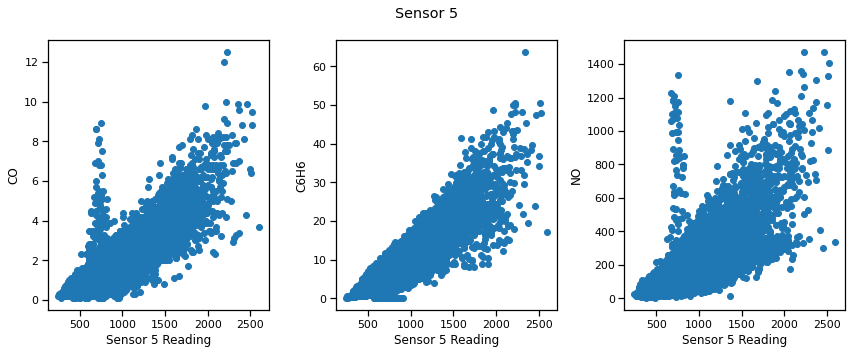

In [28]:
plt.figure(figsize=(12,5))
plt.suptitle('Sensor 5')

plt.subplot(131)
plt.scatter('sensor_5', 'target_carbon_monoxide', data=df)
plt.xlabel('Sensor 5 Reading')
plt.ylabel('CO')

plt.subplot(132)
plt.scatter('sensor_5', 'target_benzene', data=df)
plt.xlabel('Sensor 5 Reading')
plt.ylabel('C6H6')

plt.subplot(133)
plt.scatter('sensor_5', 'target_nitrogen_oxides', data=df)
plt.xlabel('Sensor 5 Reading')
plt.ylabel('NO')

plt.tight_layout()
plt.show()

**Takeaways**
- Sensor 3 has a reverse relatioship with the concentration of the toxic gases while other sensors have a direct relationship with the concentration of the toxic gases.
- Excpet sensor 1, other sensors become unrelated with the concentration of CO and NO in certain ranges. 
- Sensor 2 show a nealry perfect linear relationship with the concentration of benzene.